In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('NSE_TataGlobal.csv')

In [4]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
...,...,...,...,...,...,...,...,...
1230,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49


In [5]:
df['date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.index = df['date']
df

#df = df.sort_values(by='Date')
#df

#df = df.sort_index()
#df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),date
date,,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83,2018-10-08
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06,2018-10-05
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,2018-10-04
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,2018-10-03
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,2018-10-01
...,...,...,...,...,...,...,...,...,...
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09,2013-10-14
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76,2013-10-11
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80,2013-10-10


In [6]:
#For Year
#year = df['Date']
#year

In [7]:
#df = df.head(5)

In [8]:
close_price = df['Close']
close_price

date
2018-10-08    215.15
2018-10-05    209.20
2018-10-04    218.20
2018-10-03    227.60
2018-10-01    230.90
               ...  
2013-10-14    159.45
2013-10-11    160.05
2013-10-10    160.15
2013-10-09    155.55
2013-10-08    155.80
Name: Close, Length: 1235, dtype: float64

In [9]:
close_price.max()

325.75

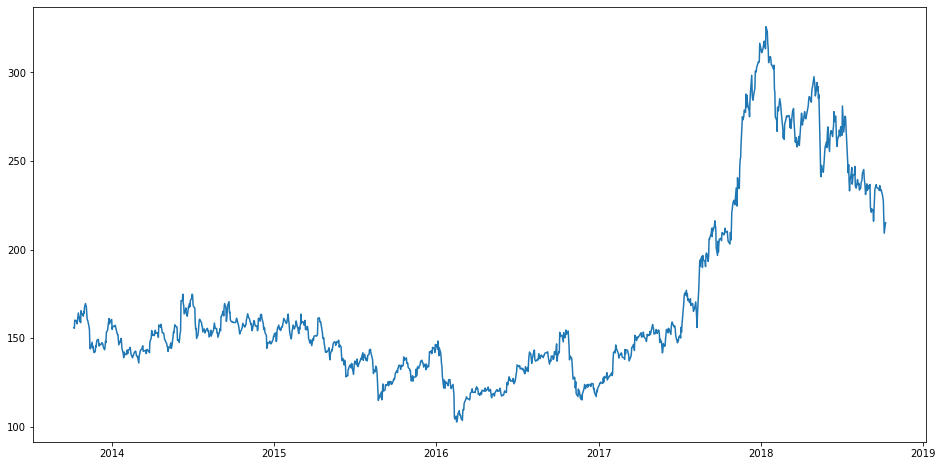

In [10]:
plt.figure(figsize=(16,8))
plt.plot(df['date'], close_price)
plt.show() # label ?

In [11]:
df_split = df.sample(frac=0.98, random_state=0)
df_split = df_split.sort_values(by='Date')
df_split

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),date
date,,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.80,155.80,1720413.0,2688.94,2013-10-08
2013-10-09,2013-10-09,155.70,158.20,154.15,155.30,155.55,2049580.0,3204.49,2013-10-09
2013-10-10,2013-10-10,156.00,160.80,155.85,160.30,160.15,3124853.0,4978.80,2013-10-10
2013-10-11,2013-10-11,161.15,163.45,159.00,159.80,160.05,1880046.0,3030.76,2013-10-11
2013-10-14,2013-10-14,160.85,161.45,157.70,159.30,159.45,1281419.0,2039.09,2013-10-14
...,...,...,...,...,...,...,...,...,...
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05,2018-10-01
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27,2018-10-03
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79,2018-10-04


In [12]:
# close value from df
window_size = 25 # 2%
  
i = 1209 # 98%
moving_averages = []
while i > -1: #i < len(df['Close']) - window_size:
    window = df['Close'][i : i + window_size] #  e.g. 248 will not count
    window_average = round(sum(window) / window_size, 2)
    moving_averages.append(window_average)
    i = i - 1
    #print(moving_averages)

In [13]:
print(len(moving_averages))

1210


In [14]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(df_split['Close'])-moving_averages),2)))
print('RMSE value on validation set:')
print(rms)

RMSE value on validation set:
7.8672457349790115


In [15]:
# Just checking the RMSE does not help us to understand how the model work. 

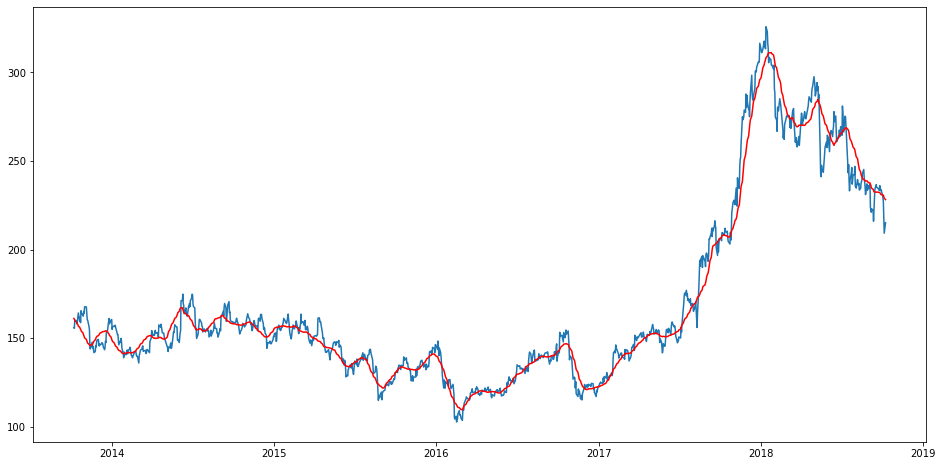

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df_split['date'], df_split['Close'])

df_split['Predictions'] = 0
df_split['Predictions'] = moving_averages
plt.plot(df_split['date'], df_split['Predictions'], color='red')

plt.show()